# Lab: Regression Analysis

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns                              # plotting library
sns.set(style='white')                             # seaborn style


from sklearn.linear_model import LogisticRegression            # logistic regression model   
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler               # standarized
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_diabetes

from sklearn.ensemble import RandomForestRegressor as RFR

from sklearn.model_selection import train_test_split as tts

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [20]:
# Your code here. 
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [21]:
# Your code here.
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

Text(0, 0.5, 'Tardies')

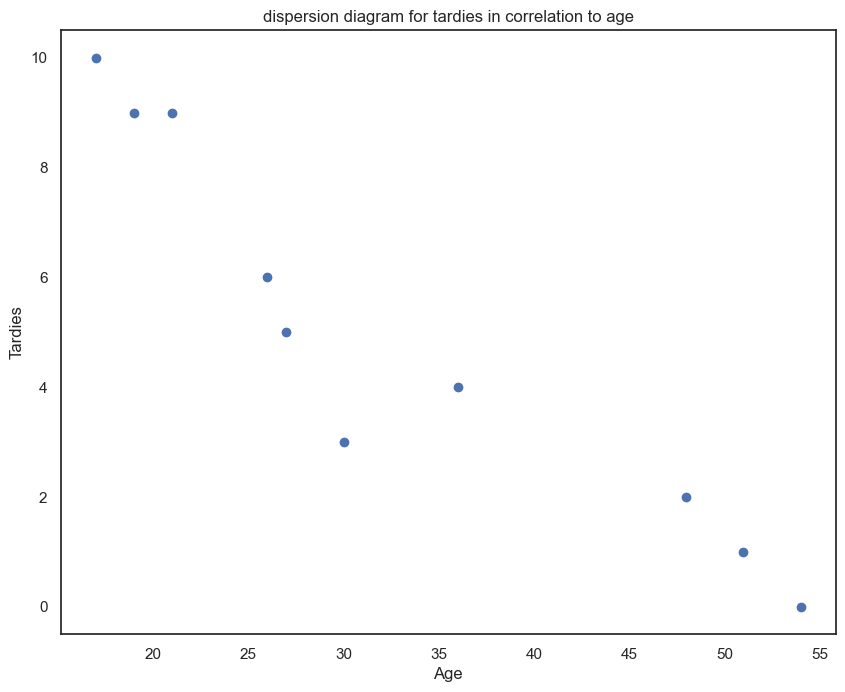

In [22]:
plt.scatter(student_data.Age, student_data.Tardies)
plt.title('dispersion diagram for tardies in correlation to age')
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [23]:
# Your response here. 

The older the student the less likely they will be late.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [24]:
# Your response here.
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [25]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [46]:
from scipy import stats
x= student_data['Age']
y= student_data['Tardies']


Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

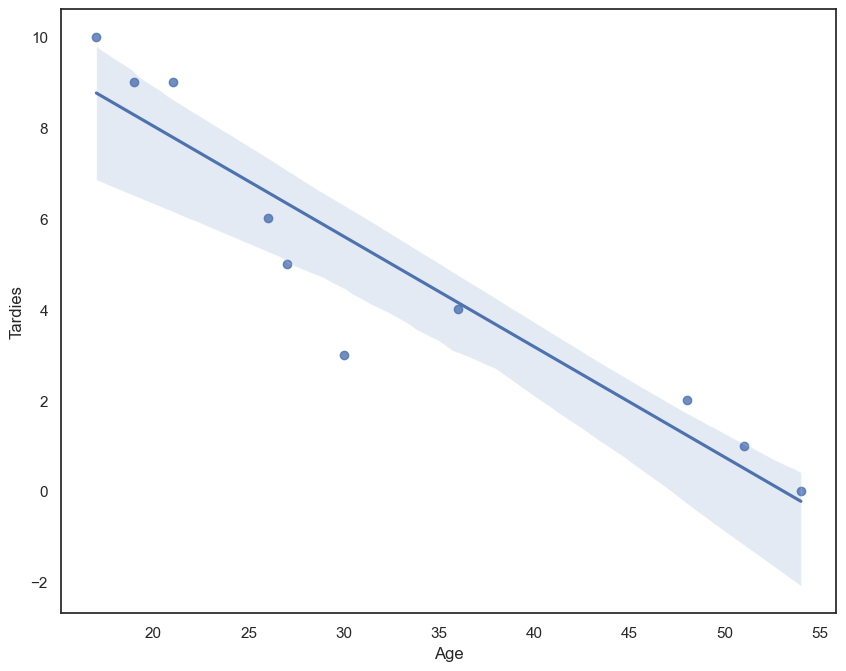

In [48]:
# Your response here.
sns.regplot(x=x, y=y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 

It tells us that there is a negative correlation between the age and tardies

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [33]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.sample()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
31985,Suzuki,SW,1999,1.3,4.0,Automatic 3-spd,Front-Wheel Drive,Subcompact Cars,Regular,11.771786,26,31,28,317.392857,1200


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [36]:
# Your response here. 
print ("The relationship of CO2 Emmissions by Grams/Miles with the years:", vehicles["CO2 Emission Grams/Mile"].corr(vehicles["Year"]))
print ("The relationship of CO2 Emmissions by Grams/Miles with the cylinders:", vehicles["CO2 Emission Grams/Mile"].corr(vehicles["Cylinders"]))
print ("The relationship of CO2 Emmissions by Grams/Miles with the fuel barrels every year:", vehicles["CO2 Emission Grams/Mile"].corr(vehicles["Fuel Barrels/Year"]))
print ("The relationship of CO2 Emmissions by Grams/Miles with the combined MPG:", vehicles["CO2 Emission Grams/Mile"].corr(vehicles["Combined MPG"]))
print ("The relationship of CO2 Emmissions by Grams/Miles with the fuel cost per year:", vehicles["CO2 Emission Grams/Mile"].corr(vehicles["Fuel Cost/Year"]))

The relationship of CO2 Emmissions by Grams/Miles with the years: -0.22229960295054219
The relationship of CO2 Emmissions by Grams/Miles with the cylinders: 0.7523925537297493
The relationship of CO2 Emmissions by Grams/Miles with the fuel barrels every year: 0.9861886621428727
The relationship of CO2 Emmissions by Grams/Miles with the combined MPG: -0.9262290389336431
The relationship of CO2 Emmissions by Grams/Miles with the fuel cost per year: 0.930865151220184


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [42]:
# Your response here. 
y = vehicles["CO2 Emission Grams/Mile"]
x = vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
lr = LinearRegression()
model = lr.fit(x,y)
print(lr.score(x,y))

0.9808734920269122


In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 